### <font color='#556b2f'> CS6301.010: Machine Learning for Engineers and Scientists (Fall '24) </font>
_**Instructor**: Dr. Nursadul Mamun_ <br>
_**Due**: **September 12 (Thursday)**_

---

# **_Homework 2_**

The report component of this assignment is the **hard copy** of this homework, along with your answers to questions, and is **due at the start of class on <font color='#556b2f'>Thursady, September 12, 2024</font>**.

The **electronic version** of this homework **must be uploaded on eLearning by <font color='#556b2f'>11:59PM Central Standard Time, Thursday, September 12, 2024</font>**. All deadlines are hard and without exceptions unless permission was obtained from the instructor **in advance**.

You may work in groups to discuss the problems and work through solutions together. However, you must **write up your solutions on your own**, without copying another student's work or letting another student copy your work. In your solution for each problem, you must write down the names of your partner (if any); this will not affect your grade.

---

# 1. <font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>, 50 points.

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [1]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION,
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)

  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(42)
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')

  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac,
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac,
                                                random_state=42)

  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)


In [2]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION,
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1

  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01),
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1],
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    ax.set_title('{0} = {1}'.format(param, p))

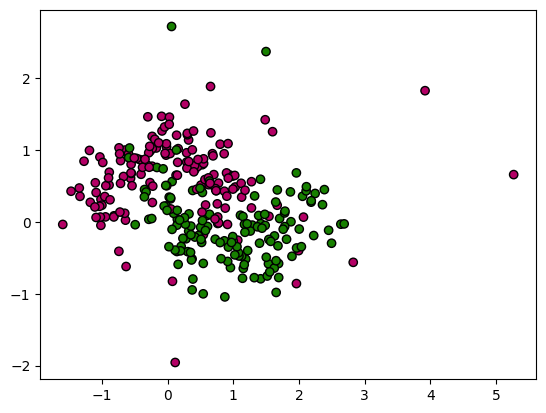

In [3]:
# Generate the data
n_samples = 300    # Total size of data set
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)



---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

The best value of C is  100000.0
The accuracy of the model is  0.86


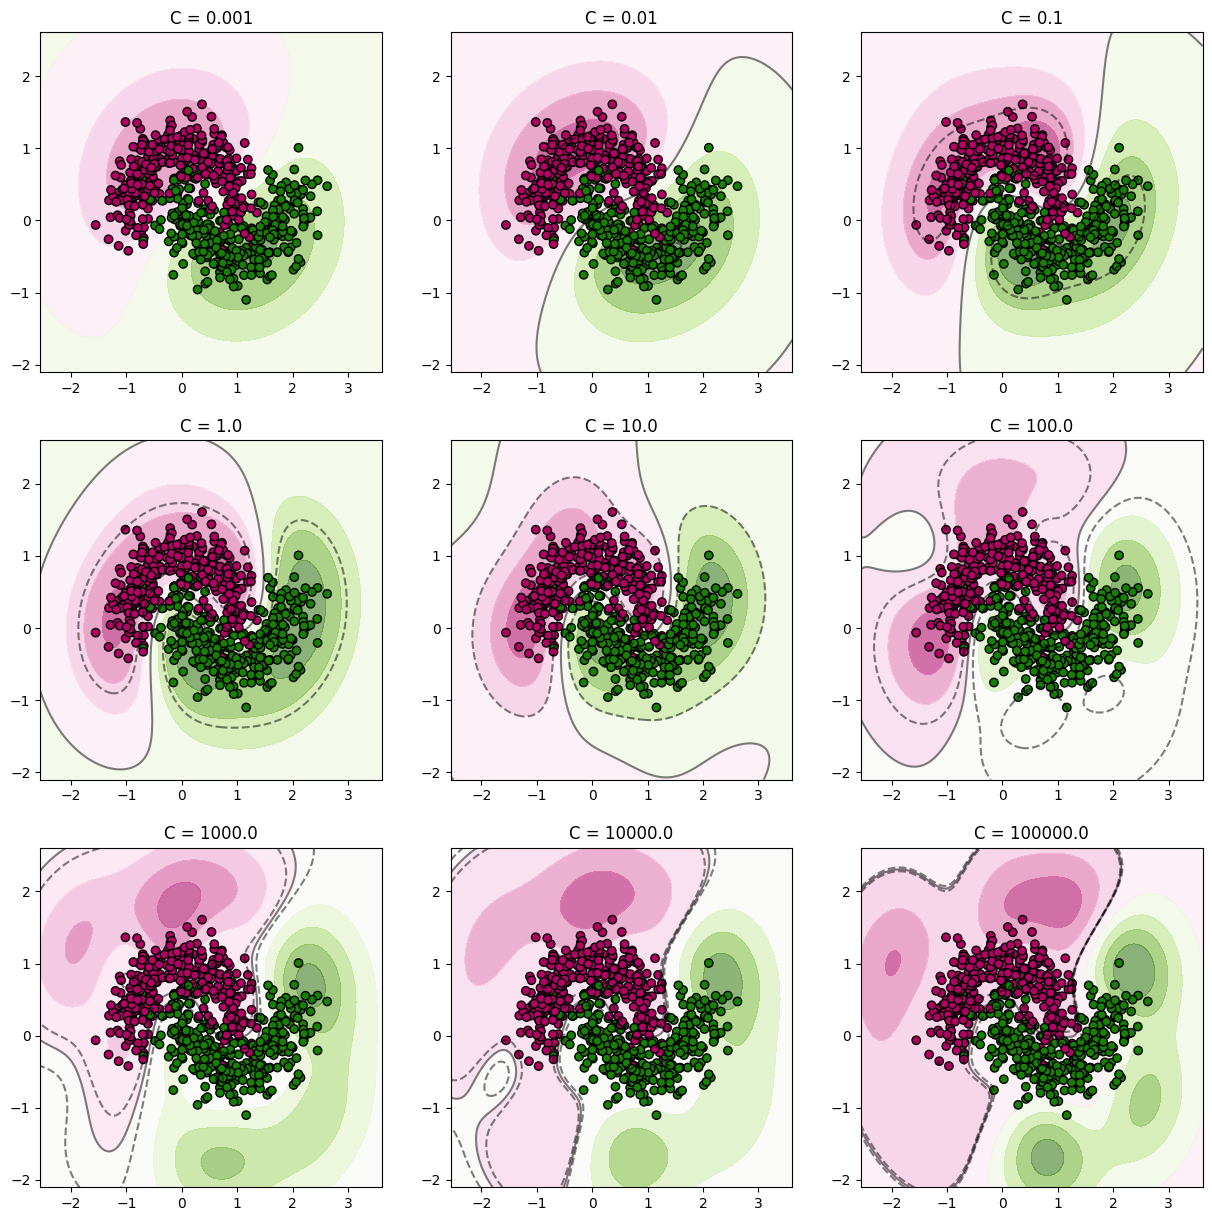

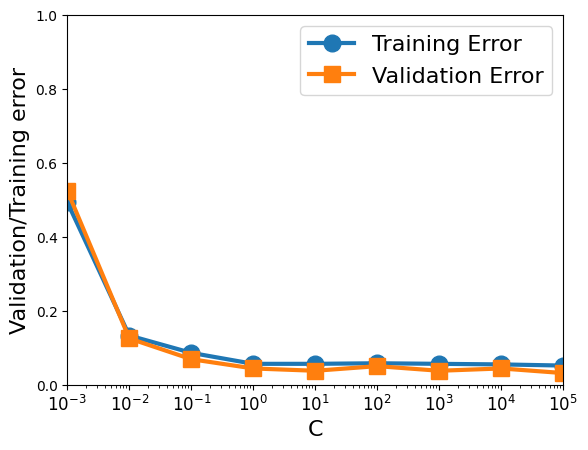

In [5]:
# Learn support vector classifiers with a radial-basis function kernel with
# fixed gamma = 1 / (n_features * X.std()) and different values of C
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# ***Your Code Starts Here***

# Use np.arange to select a range from -3.0 to 6.0 with steps of 1.0
C_range = np.arange(-3.0, 6.0, 1.0)
# Use np.power to select C_values as 10.0 ^ C_range
C_values = np.power(10.0, C_range)

# ***Your Code Ends Here***

models = dict()
trnErr = dict()
valErr = dict()
gamma1=dict()


# ***Your Code Starts Here***

# Run the loop for all C_values
for C in C_values:
    #Crete a non-linear SVM classifier
    clf= SVC(C=C, gamma='scale', random_state=42)
    #Train Classifier
    models[C]= clf.fit(X_trn, y_trn)

    y_pred_trn = clf.predict(X_trn)
    trnErr[C] = 1 - accuracy_score(y_trn, y_pred_trn)
    #trnErr[C]= None
    #valErr[C]= None
    y_pred_val = clf.predict(X_val)
    valErr[C] = 1 - accuracy_score(y_val, y_pred_val)

# ***Your Code Ends Here***


#visualise on training and validation data data
visualize(models, 'C', X_trn, y_trn)
# Plot all the models
plt.figure()
plt.semilogx(trnErr.keys(), trnErr.values(), marker='o', linewidth=3, markersize=12)
plt.semilogx(valErr.keys(), valErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('C', fontsize=16)
plt.ylabel('Validation/Training error', fontsize=16)
plt.xticks(list(trnErr.keys()), fontsize=12)
plt.legend(['Training Error', 'Validation Error'], fontsize=16)

plt.axis([10**-3, 10**5, 0, 1])

# Find Best C and find the accuracy
C_best, Min_Error =min(valErr.items(), key=lambda x: x[1])
print('The best value of C is ', C_best)
clf=SVC(C = C_best, gamma='scale')
models=clf.fit(X_trn, y_trn)
Accuracy = (clf.score(X_tst, y_tst, sample_weight=None))
print('The accuracy of the model is ', Accuracy)

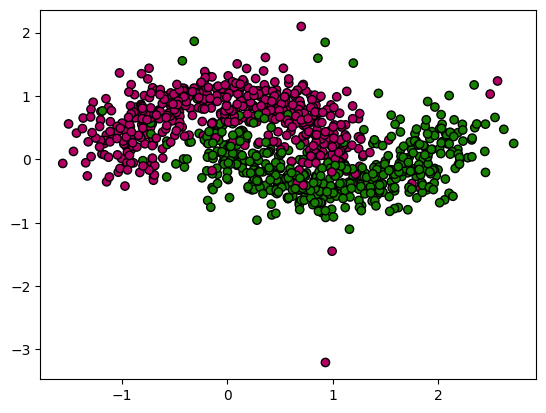

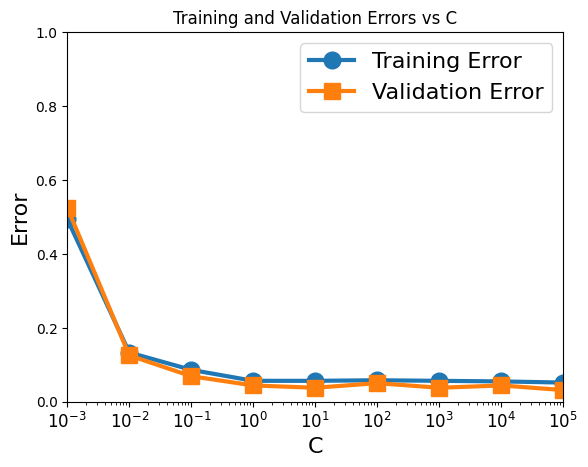

The best value of C is  100000.0
The accuracy of the model on the test set is  0.86


In [6]:
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# ***Your Code Starts Here***

# Use np.arange to select a range from -3.0 to 6.0 with steps of 1.0
C_range = np.arange(-3.0, 6.0, 1.0)
# Use np.power to select C_values as 10.0 ^ C_range
C_values = np.power(10.0, C_range)

# ***Your Code Ends Here***

models = dict()
trnErr = dict()
valErr = dict()

# Split the dataset further into training and validation sets (assuming X and y are available)
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples=1000, tst_frac=0.2, val_frac=0.2)

# ***Your Code Starts Here***

# Run the loop for all C_values
for C in C_values:
    # Create a non-linear SVM classifier with RBF kernel and gamma='scale'
    clf = SVC(C=C, gamma='scale', random_state=42)

    # Train Classifier
    models[C] = clf.fit(X_trn, y_trn)

    # Compute training error
    y_pred_trn = clf.predict(X_trn)
    trnErr[C] = 1 - accuracy_score(y_trn, y_pred_trn)

    # Compute validation error
    y_pred_val = clf.predict(X_val)
    valErr[C] = 1 - accuracy_score(y_val, y_pred_val)

# ***Your Code Ends Here***

# Visualize the training and validation errors over different values of C
plt.figure()
plt.semilogx(list(trnErr.keys()), list(trnErr.values()), marker='o', linewidth=3, markersize=12, label='Training Error')
plt.semilogx(list(valErr.keys()), list(valErr.values()), marker='s', linewidth=3, markersize=12, label='Validation Error')
plt.xlabel('C', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.xticks(list(trnErr.keys()), fontsize=12)
plt.legend(['Training Error', 'Validation Error'], fontsize=16)
plt.axis([10**-3, 10**5, 0, 1])
plt.title('Training and Validation Errors vs C')
plt.show()

# Find Best C (with minimum validation error)
C_best, Min_Error = min(valErr.items(), key=lambda x: x[1])
print('The best value of C is ', C_best)

# Train the best SVM model on the entire training set
clf_best = SVC(C=C_best, gamma='scale', random_state=42)
clf_best.fit(X_trn, y_trn)

# Compute test set accuracy
test_accuracy = clf_best.score(X_tst, y_tst)
print('The accuracy of the model on the test set is ', test_accuracy)


---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

The best value of gamma is  10.0
The accuracy of the model is  0.84


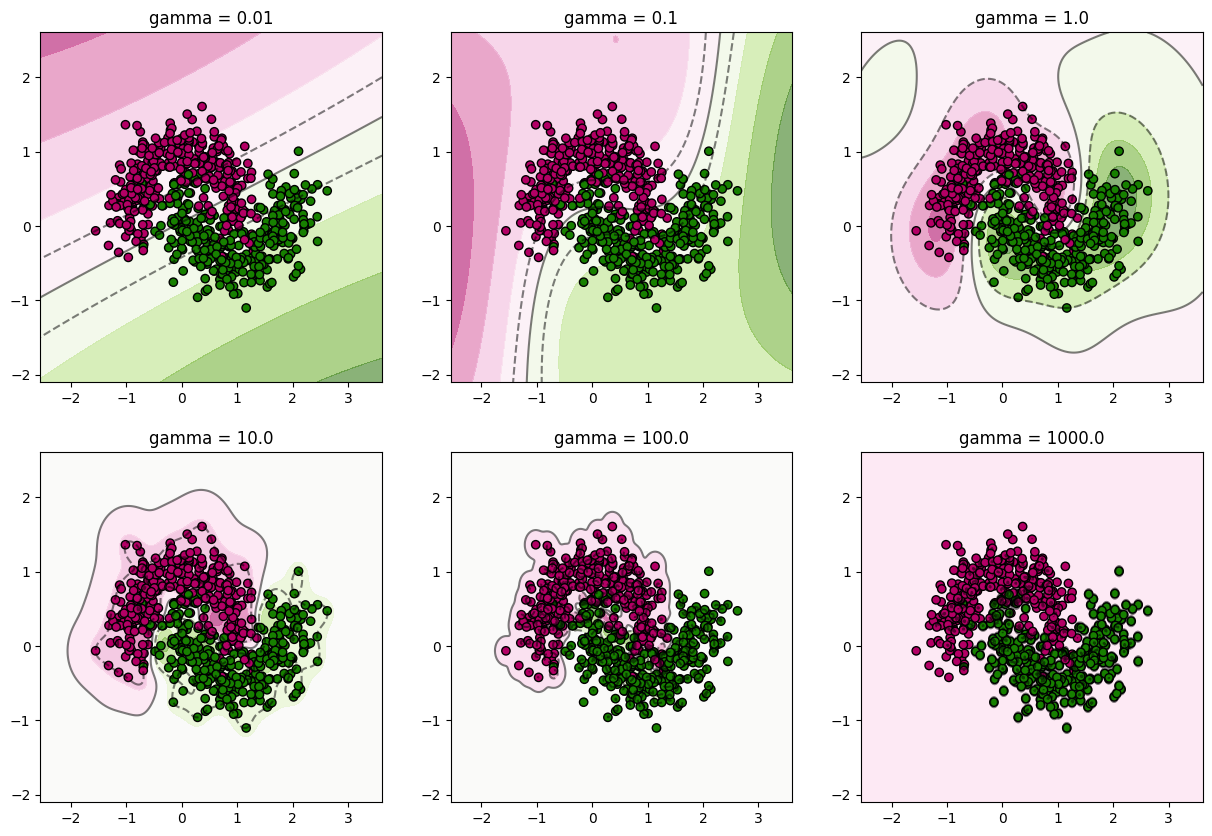

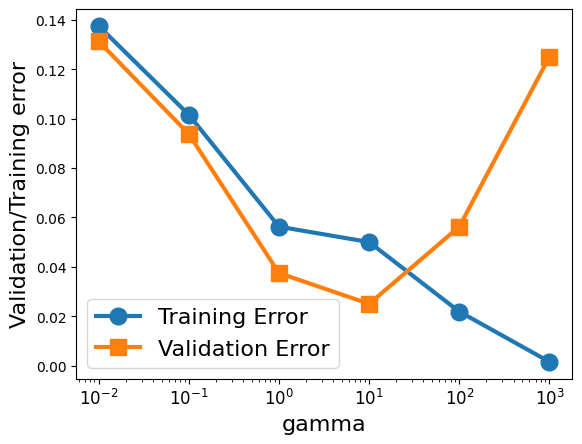

In [7]:
# Learn support vector classifiers with a radial-basis function kernel with
# fixed C = 10.0 and different values of gamma

# ***Your Code Starts Here***

# Use np.arange to select a range from -2.0 to 4.0 with steps of 1.0
gamma_range = np.arange(-2.0, 4.0, 1.0)
# Use np.power to select gamma_values as 10.0 ^ gamma_range
gamma_values = np.power(10.0, gamma_range)

# ***Your Code Ends Here***

models = dict()
trnErr = dict()
valErr = dict()

# ***Your Code Starts Here***

# Run the loop for all gamma_values
for G in gamma_values:
    #Crete a non-linear SVM classifier with kernel = 'rbf'
    clf= SVC(C=10, kernel='rbf', gamma=G)
    #Train Classifier
    clf.fit(X_trn, y_trn)   #the accuracy of the model on the training
    models[G]= clf
    trnErr[G]= 1 - clf.score(X_trn, y_trn)
    valErr[G]= 1 - clf.score(X_val, y_val)

# ***Your Code Ends Here***

visualize(models, 'gamma', X_trn, y_trn)
# Plot all the models
plt.figure()
plt.semilogx(trnErr.keys(), trnErr.values(), marker='o', linewidth=3, markersize=12)
plt.semilogx(valErr.keys(), valErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('gamma', fontsize=16)
plt.ylabel('Validation/Training error', fontsize=16)
plt.xticks(list(trnErr.keys()), fontsize=12)
plt.legend(['Training Error', 'Validation Error'], fontsize=16)



# Find Best gamma and find the accuracy
gamma_best, Min_Error =min(valErr.items(), key=lambda x: x[1])
print('The best value of gamma is ', gamma_best)
clf=SVC(C=10, kernel='rbf', gamma=gamma_best)
models=clf.fit(X_trn, y_trn)
Accuracy = (clf.score(X_tst, y_tst, sample_weight=None))
print('The accuracy of the model is ', Accuracy)

---
# 2. <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points.

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [8]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()

file_trn = 'wdbc_trn.csv'
file_val = 'wdbc_val.csv'
file_tst = 'wdbc_tst.csv'

X_trn=np.loadtxt(file_trn, usecols=np.arange(1, 31), delimiter = ",")
y_trn=np.loadtxt(file_trn, usecols=0, delimiter = ",")


X_val=np.loadtxt(file_val, usecols=np.arange(1, 31), delimiter = ",")
y_val=np.loadtxt(file_val, usecols=0, delimiter = ",")


X_tst=np.loadtxt(file_tst, usecols=np.arange(1, 31), delimiter = ",")
y_tst=np.loadtxt(file_tst, usecols=0, delimiter = ",")



Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [10]:
# ***Your Code Starts Here***

C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

# ***Your Code Ends Here***

models = dict()
trnErr = dict()
valErr = dict()

# ***Your Code Starts Here***

for G in gamma_values:
    for C in C_values:
        #Crete a non-linear SVM classifier
        clf= SVC(C=C, kernel='rbf', gamma=G)
        clf.fit(X_trn, y_trn)
        #Train Classifier
        models[G,C]= clf
        trnErr[G,C]= 1 - clf.score(X_trn, y_trn)
        valErr[G,C]= 1 - clf.score(X_val, y_val) 



# Insert your code here to perform model selection
# Find Best gamma and C and find the accuracy
(C_best, gamma_best), Min_Error = min(valErr.items(), key=lambda x: x[1])

# ***Your Code Ends Here***

print('The best value of gamma is ', gamma_best)
print('The best value of C is ', C_best)

clf=SVC(C = C_best, kernel='rbf', gamma=gamma_best)
models=clf.fit(X_trn, y_trn)
Accuracy = (clf.score(X_tst, y_tst, sample_weight=None))
print('The accuracy of the model is ', Accuracy)

The best value of gamma is  100.0
The best value of C is  0.01
The accuracy of the model is  0.6260869565217392


---
# 3. <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>, 25 points.

Use scikit-learn's [k-nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier to learn models for Breast Cancer Diagnosis with $k \in \{1, \, 5, \, 11, \, 15, \, 21\}$, with the kd-tree algorithm.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter value, $k_{best}$. Report the accuracy on the **test set** for this selected best kNN model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $k_{best}$_.

The best value of gamma is  5
The accuracy of the model is  0.9565217391304348


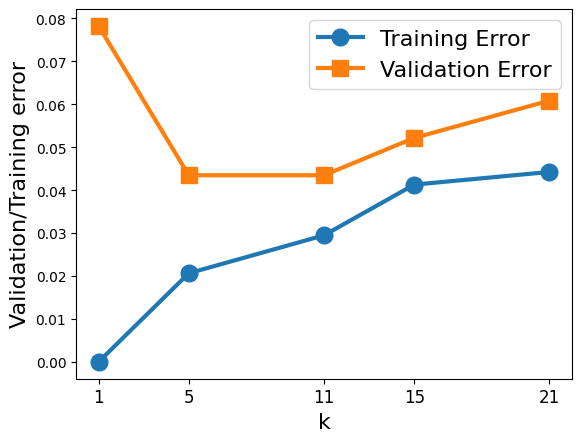

In [12]:
from sklearn.neighbors import KNeighborsClassifier
models = dict()
trnErr = dict()
valErr = dict()

# ***Your Code Starts Here***

k_values = [1, 5, 11, 15, 21]

for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    neigh.fit(X_trn, y_trn)
    #models = None
    models[k] = neigh
    #trnErr[k] = None
    trnErr[k] = 1 - neigh.score(X_trn, y_trn)
    valErr[k] = 1 - neigh.score(X_val, y_val)
    #valErr[k] = None


# ***Your Code Ends Here***



# Plot all the models
plt.figure()
plt.plot(trnErr.keys(), trnErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(valErr.keys(), valErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('k', fontsize=16)
plt.ylabel('Validation/Training error', fontsize=16)
plt.xticks(list(trnErr.keys()), fontsize=12)
plt.legend(['Training Error', 'Validation Error'], fontsize=16)


# ***Your Code Starts Here***

# Find Best gamma and find the accuracy
k_best, Min_Error = min(valErr.items(), key=lambda x: x[1])

# ***Your Code Ends Here***

print('The best value of gamma is ', k_best)
neigh = KNeighborsClassifier(n_neighbors=k_best,algorithm='kd_tree')
models=neigh.fit(X_trn, y_trn)
Accuracy = (neigh.score(X_tst, y_tst, sample_weight=None))
print('The accuracy of the model is ', Accuracy)

**Discussion**: Which of these two approaches, SVMs or kNN, would you prefer for this classification task? Explain.

 ## SVM Vs KNN

## KNN perform better than SVM ao that  I would prefere KNN over SVM the reason is below:

 ### 1. Dataset is small
 ### 2. Decision boundary is not very complex and data is well separated
 ### 3. It provide better accuracy than SVM